In [1]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs 
%matplotlib inline

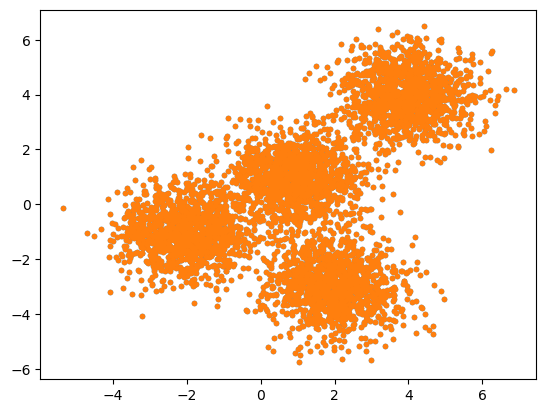

In [3]:
#k-Means on a randomly generated dataset
np.random.seed(0)
x, y = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)
plt.scatter(x[:, 0], x[:, 1], marker='.')
plt.show()

In [4]:
#Setting up K-Means
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)
k_means.fit(x)

KMeans(n_clusters=4, n_init=12)

In [5]:
k_means_labels = k_means.labels_
k_means_labels

array([0, 3, 3, ..., 1, 0, 0], dtype=int32)

In [6]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-2.03743147, -0.99782524],
       [ 3.97334234,  3.98758687],
       [ 0.96900523,  0.98370298],
       [ 1.99741008, -3.01666822]])

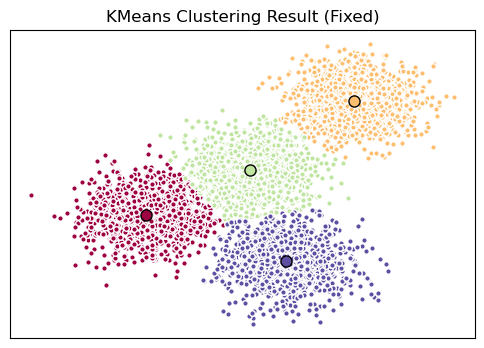

In [14]:
# FIX 1: Use plt.subplots() for guaranteed single figure creation
fig, ax = plt.subplots(figsize=(6, 4)) 

# Colors uses a color map
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# For loop that plots the data points and centroids.
for k, col in zip(range(len(k_means_cluster_centers)), colors):

    my_members = (k_means_labels == k)
    cluster_center = k_means_cluster_centers[k]
    
    # Plots the datapoints
    ax.plot(x[my_members, 0], x[my_members, 1], 'w', markerfacecolor=col, marker='.', markersize=8)
    
    # Plots the centroids
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=8)

# Title of the plot
ax.set_title('KMeans Clustering Result (Fixed)')

# FIX 2: To show the scales, you must REMOVE or COMMENT OUT these lines:
ax.set_xticks(()) # Removes x-axis ticks
ax.set_yticks(()) # Removes y-axis ticks

# If you prefer to remove only the tick *labels* but keep the plot area defined:
ax.set_xticks([])
ax.set_yticks([])

# Show the plot
plt.show()